# DT2470 Lab 02: Teh Machine Learnings

by Bob L. T. Sturm

In this lab you will practice some fundamental concepts of machine learning. In the first part you will work with an artificial dataset. The second part involves a music dataset. There's a lot more to explore, so this lab only scratches the surface!

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python.

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Pandas API](https://pandas.pydata.org/docs/reference/index.html#api)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.


---



# Part 1: Basics

In this part, you will explore some basic principles of machine learning. First we are going to synthesize a "toy" dataset, where we know everything about the data. This is the "best case scenario", and can help us understand ML methods and their parameters, as well as debug implementations.

For more information:
- [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html) 

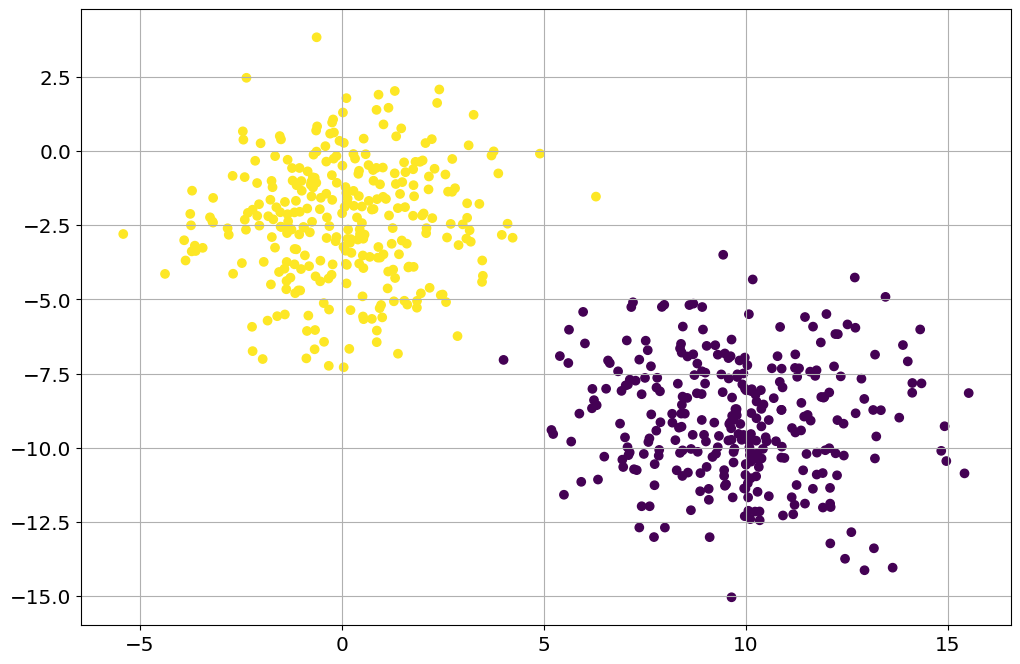

In [2]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

numClasses = 2 # number of separate classes
numObservations = numClasses*300 # number of total observations
cluster_std = 2 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

# 1.1
Create a 80/20 train/test split of your data. See [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) for the function *train_test_split*.

In [3]:
from sklearn.model_selection import train_test_split
# add your code below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)


# 1.2

Create an instance of a nearest neighbor classifier and train it with your *training* data. See [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) for the appropriate function.

In [4]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)


KNeighborsClassifier()

# 1.3 

Plot the decision boundary of your trained classifier. Use the *plot_decision_regions* function in [mlxtend.plotting](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions).

<Axes: >

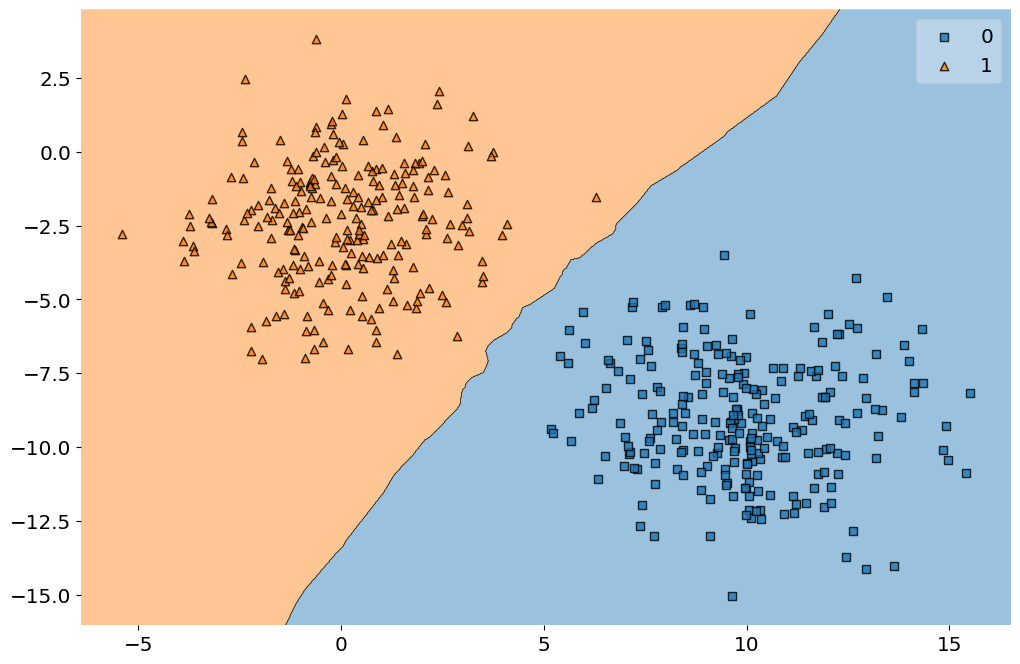

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
# add your code below

plot_decision_regions(X_train, y_train, classifier)

# 1.4

Use your classifier to label the hold out set, and print out the predicted labels and true labels. 

In [6]:
# add your code below
import sklearn
y_prev = classifier.predict(X_test)
for i in range(len(y_prev)):
    print(y_prev[i],y_test[i])

1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 0
0 0


# 1.5 

Print the confusion matrix of the results. See [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a relevant function.

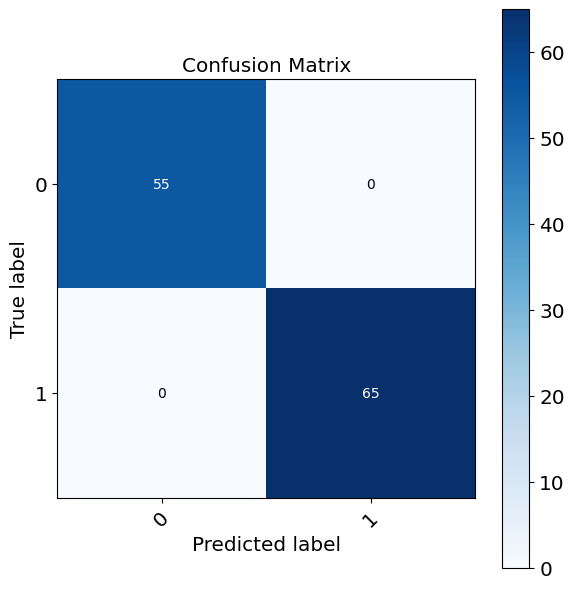

In [7]:
# add your code below
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_test,y_prev)
classes = unique_labels(y_test, y_prev)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), va='center', ha='center',
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


# 1.6

Use the *classification_report* function of [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to print out more metrics for your classifier.

In [8]:
from sklearn.metrics import classification_report
# add your code below
report = classification_report(y_test,y_prev)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        65

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# 1.7 

Now you will explore k nearest neighbor classification with the toy dataset.
Create a 50/30/20 train/validation/test split of your data.

In [9]:
# add your code below

#train/validation and test splitting
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)

#train and validation splitting
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.375,shuffle=True)


# 1.8

For k in 1 to 51 by odd integers, train a kNN classifier and compute its accuracy on the training dataset and the validation dataset. Plot these accuracies as a function of k.

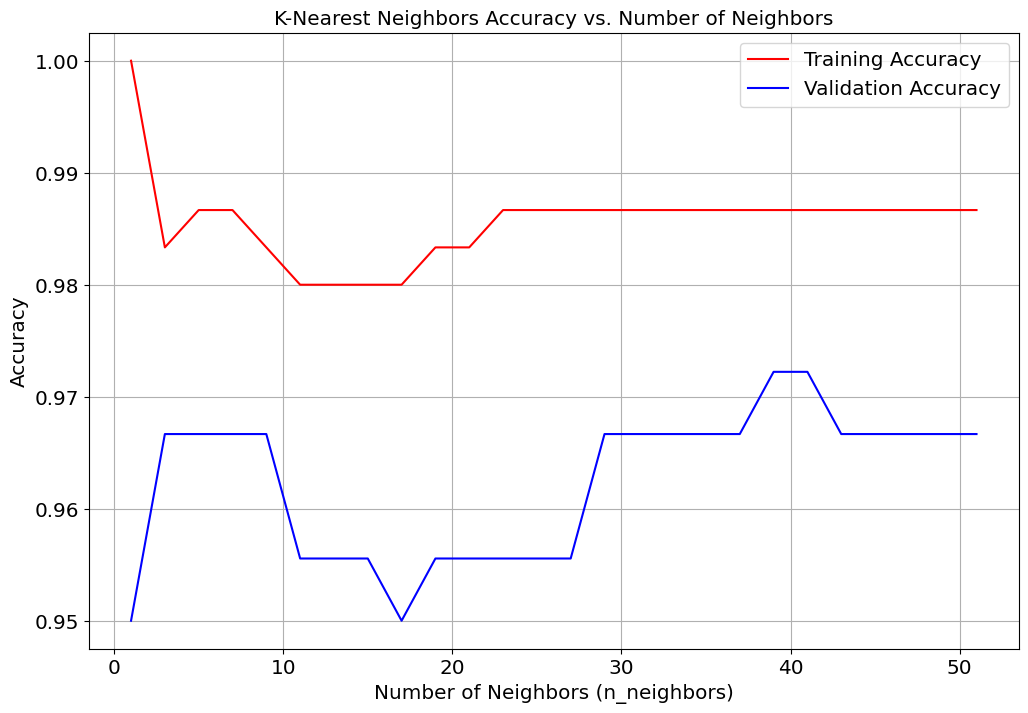

In [23]:
# add your code below

from sklearn.metrics import accuracy_score

train_acc = []
valid_acc = []

for i in range(1,52,2):

    cf = KNeighborsClassifier(n_neighbors=i)
    cf.fit(X_train, y_train)

    y_train_prev = cf.predict(X_train)
    y_valid_prev = cf.predict(X_valid)

    train_acc.append(accuracy_score(y_train,y_train_prev))
    valid_acc.append(accuracy_score(y_valid,y_valid_prev))

plt.plot(range(1, 52, 2), train_acc, label='Training Accuracy', color='red')
plt.plot(range(1, 52, 2), valid_acc, label='Validation Accuracy', color='blue')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

## Generalization, Overfitting, and Underfitting

* If a model is able to make accurate predictions on unseen data: 
    * it is able to **generalize** from the training set to the test set.
* Building a model that is too complex for the amount of information in the data is called overfitting.
* This refers to the complexity of the decision boundary, **NOT** computational complexity.

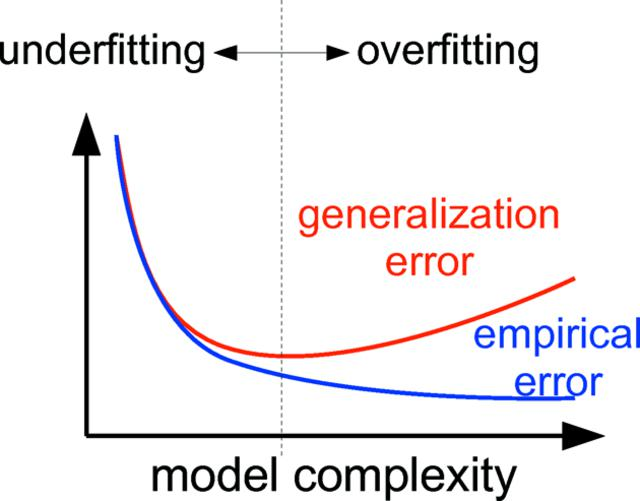

# 1.9

The complexity of KNN models decreases with K. Find the K with the highest validation accuracy, and train a kNN classifier with that K on the training data. Test it on the testing data and print its classification_report. If there are several possible K, choose one by some strategy.

In [24]:
# add your code below
n_neighbors = np.argmax(valid_acc)*2 + 1
cf = KNeighborsClassifier(n_neighbors=n_neighbors)
cf.fit(X_train, y_train)
y_prev = cf.predict(X_test)
report = classification_report(y_test,y_prev)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        61

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



# 1.10
For this classifier, plot its decision boundary, and compare with the boundary you see in #1.3.

<Axes: >

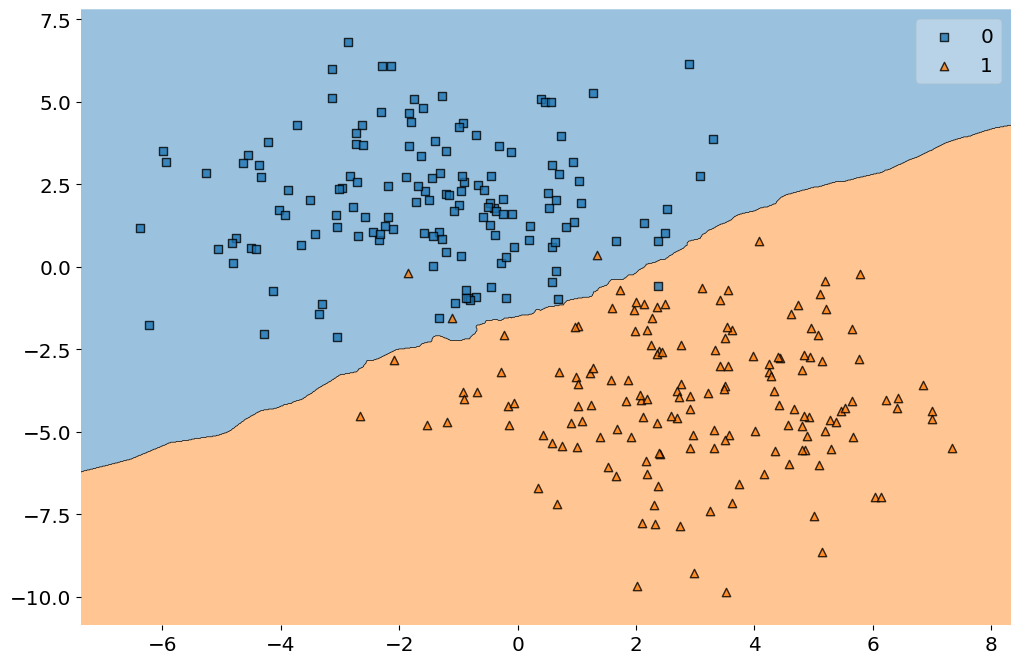

In [25]:
# add your code below
plot_decision_regions(X_train, y_train, cf)

# 1.11

Change the toy dataset (number of classes, number of observations, cluster spread) and repeat the above. What happens as the cluster spread increase? What happens if there are more classes?
We tried to improve the number of classes and the spread. In both cases we have a decrease of the accuracy due to most complex dataset: neighbours are separated in a less evident way and the classification task finds more difficulties.

NumClasses = 2, numObservations = 1000, cluster_std = 10

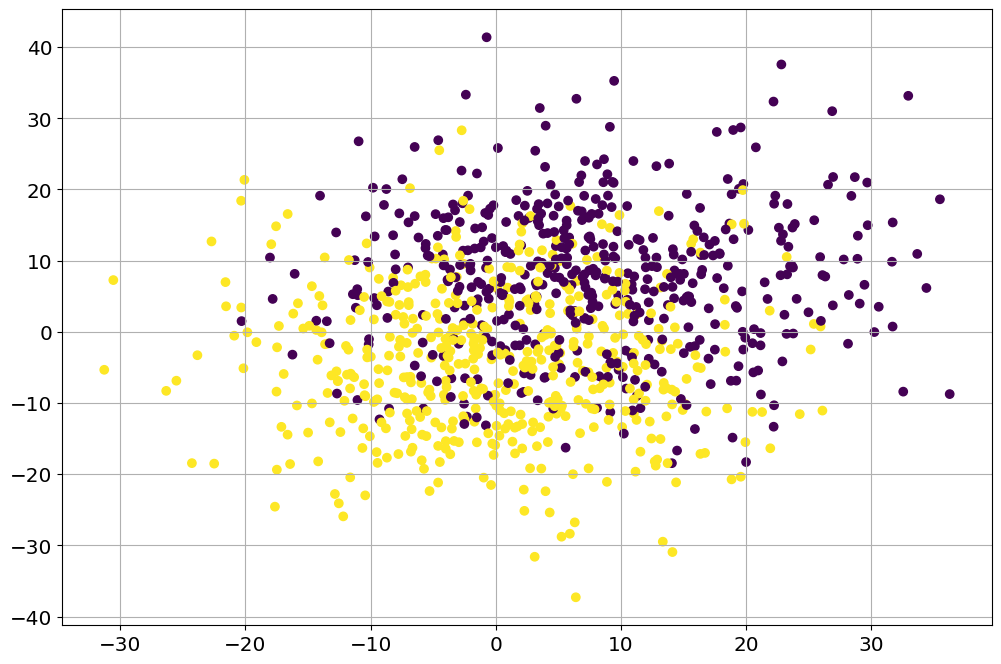

In [1]:
# add your code below
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

numClasses = 2 # number of separate classes
numObservations = numClasses*500 # number of total observations
cluster_std = 10 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

In [2]:
from sklearn.model_selection import train_test_split
# add your code below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)

In [3]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

<Axes: >

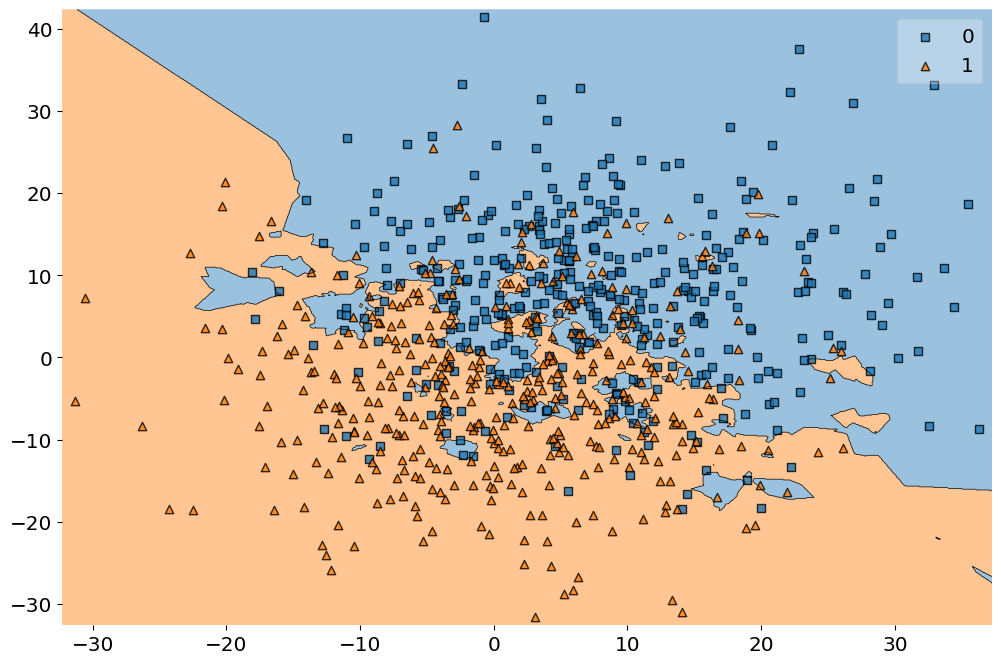

In [4]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
# add your code below

plot_decision_regions(X_train, y_train, classifier)

In [5]:
# add your code below
import sklearn
y_prev = classifier.predict(X_test)
for i in range(len(y_prev)):
    print(y_prev[i],y_test[i])

1 1
0 0
1 0
1 0
0 0
1 1
1 1
1 0
1 1
0 0
0 0
1 1
1 1
1 1
0 0
1 1
0 1
0 0
0 0
0 0
1 0
0 0
1 1
0 0
1 1
0 0
1 0
1 1
0 0
0 1
0 0
1 1
0 0
1 1
0 1
1 1
0 1
1 0
0 1
0 0
1 0
0 1
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 1
0 1
1 0
1 1
1 1
1 0
0 0
1 1
0 1
0 0
1 1
1 0
1 1
1 1
1 1
0 0
1 1
1 0
0 0
0 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
1 0
0 0
1 1
0 1
0 0
1 0
0 0
0 1
0 1
1 1
1 1
0 1
1 1
1 1
1 0
1 1
0 0
1 1
0 0
0 1
1 0
0 0
1 0
0 0
0 0
0 1
0 0
1 0
1 1
0 0
1 1
1 1
0 1
1 0
0 1
0 0
0 0
0 0
1 1
0 0
1 1
1 0
0 0
0 0
0 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
0 1
0 0
0 0
1 1
0 0
1 1
1 1
0 1
0 0
1 1
1 1
1 0
0 0
0 0
0 0
0 1
1 0
0 0
1 1
1 0
0 1
0 1
1 0
0 1
1 1
0 0
1 1
1 1
0 0
0 1
1 1
0 0
0 1
1 0
0 0
0 0
1 0
1 1
1 1
0 1
0 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 0
1 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
0 0


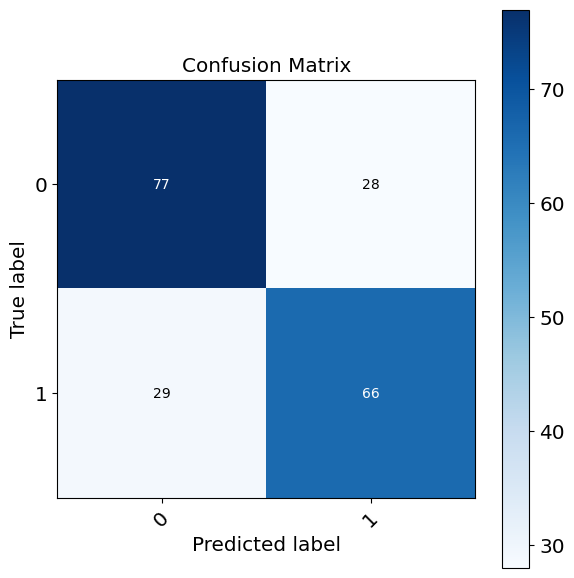

In [6]:
# add your code below
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_test,y_prev)
classes = unique_labels(y_test, y_prev)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), va='center', ha='center',
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import classification_report
# add your code below
report = classification_report(y_test,y_prev)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       105
           1       0.70      0.69      0.70        95

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



In [8]:
# add your code below
#train/validation and test splitting
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)
#train and validation splitting
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.375,shuffle=True)

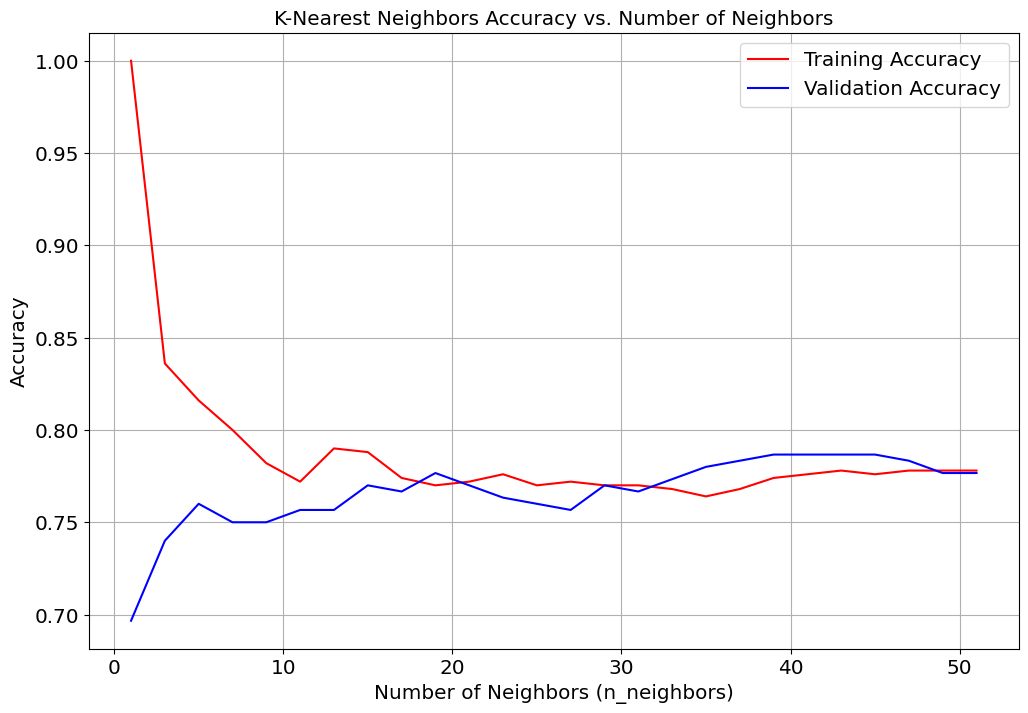

In [9]:
# add your code below

from sklearn.metrics import accuracy_score

train_acc = []
valid_acc = []

for i in range(1,52,2):

    cf = KNeighborsClassifier(n_neighbors=i)
    cf.fit(X_train, y_train)

    y_train_prev = cf.predict(X_train)
    y_valid_prev = cf.predict(X_valid)

    train_acc.append(accuracy_score(y_train,y_train_prev))
    valid_acc.append(accuracy_score(y_valid,y_valid_prev))

plt.plot(range(1, 52, 2), train_acc, label='Training Accuracy', color='red')
plt.plot(range(1, 52, 2), valid_acc, label='Validation Accuracy', color='blue')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# add your code below
n_neighbors = np.argmax(valid_acc)*2 + 1
cf = KNeighborsClassifier(n_neighbors=n_neighbors)
cf.fit(X_train, y_train)
y_prev = cf.predict(X_test)
report = classification_report(y_test,y_prev)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       105
           1       0.68      0.75      0.71        95

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



<Axes: >

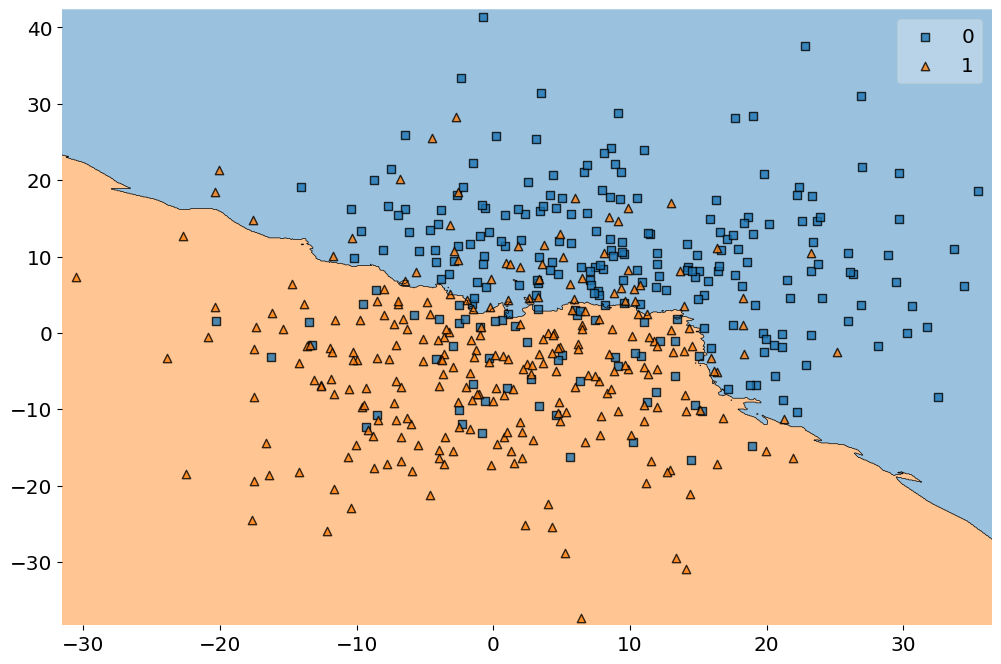

In [11]:
# add your code below
plot_decision_regions(X_train, y_train, cf)

NumClasses = 10, numObservations = 5000, cluster_std = 2

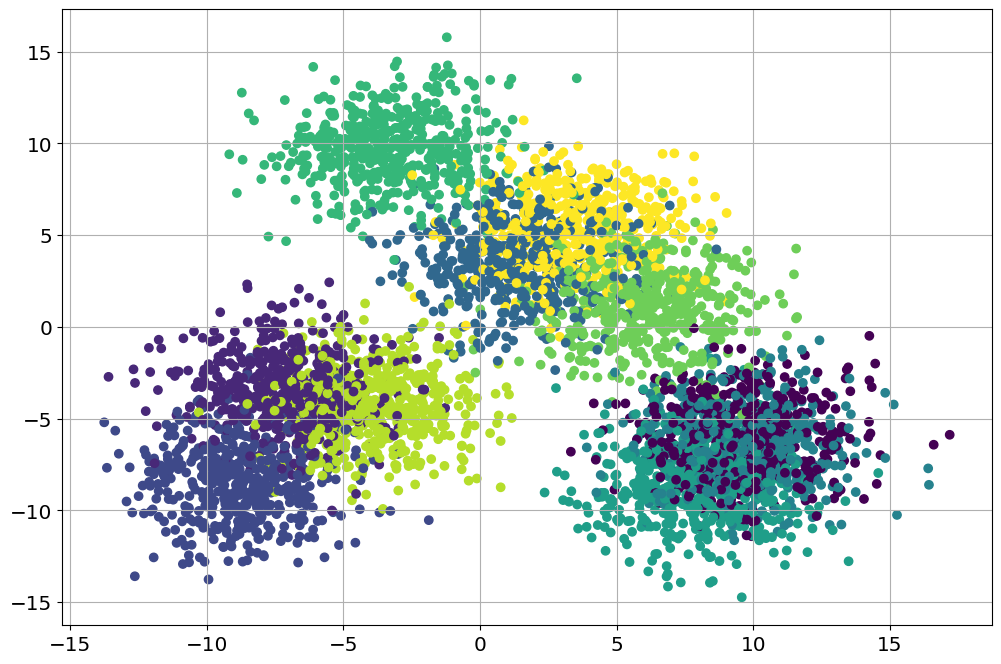

In [12]:
# add your code below
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

numClasses = 10 # number of separate classes
numObservations = numClasses*500 # number of total observations
cluster_std = 2 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

In [13]:
from sklearn.model_selection import train_test_split
# add your code below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)

In [14]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

C:\Users\simon\miniconda3\envs\EgoVision\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

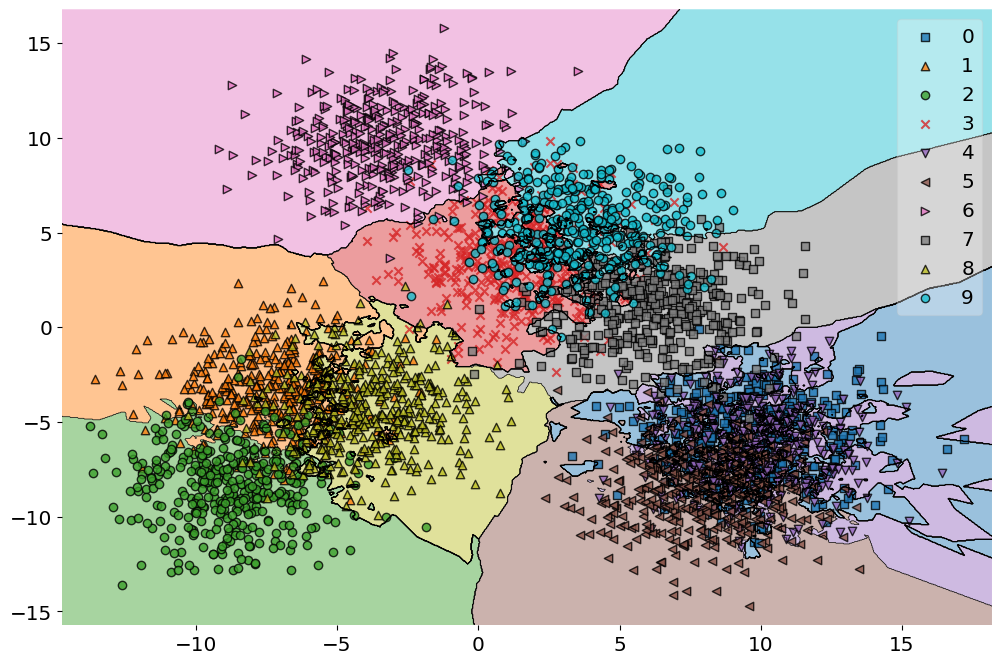

In [17]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
# add your code below

plot_decision_regions(X_train, y_train, classifier)

In [18]:
# add your code below
import sklearn
y_prev = classifier.predict(X_test)
for i in range(len(y_prev)):
    print(y_prev[i],y_test[i])

8 8
0 0
2 2
8 1
6 6
4 4
3 3
3 3
1 1
0 0
6 6
0 4
7 7
1 1
7 7
1 8
8 8
1 1
9 9
8 8
8 8
0 0
7 7
8 8
2 2
8 8
2 2
3 9
2 2
1 1
1 1
7 7
7 3
9 9
4 0
2 1
1 1
7 7
2 2
1 1
7 7
4 4
9 7
0 4
2 2
6 6
9 6
3 3
3 9
6 6
2 2
2 2
7 7
1 1
0 4
7 3
6 6
4 5
8 1
9 9
8 1
3 3
2 1
9 9
9 9
5 5
0 4
3 3
5 5
7 3
8 8
5 5
8 8
5 5
0 5
2 2
3 3
7 3
8 8
9 9
5 4
1 1
9 9
4 0
5 5
7 3
5 5
5 5
5 5
8 8
7 7
0 7
9 9
5 5
6 6
1 1
0 4
8 1
1 1
8 8
6 6
4 4
3 3
9 3
4 0
1 1
3 3
4 4
0 0
6 6
8 8
3 9
9 7
9 9
9 9
3 9
1 1
4 0
0 0
4 5
5 5
6 6
4 4
2 2
1 8
1 1
3 3
4 0
6 6
9 9
4 0
9 9
2 1
3 3
0 4
5 5
0 0
5 5
2 2
9 9
8 1
8 1
5 4
3 9
5 4
3 3
6 6
1 1
3 3
2 2
4 7
9 9
7 7
2 2
8 1
3 3
3 3
8 8
3 7
8 1
0 4
9 9
8 8
7 7
1 1
8 8
6 6
4 4
6 6
2 2
2 2
2 2
9 9
8 2
8 8
3 3
9 9
9 9
4 0
6 6
7 3
3 3
5 5
0 0
7 7
9 9
1 1
5 5
1 1
8 8
5 5
3 3
0 4
8 8
3 3
1 1
9 9
5 5
5 5
7 3
0 4
0 4
5 5
0 5
2 1
6 6
0 4
5 4
8 2
7 9
9 9
7 7
5 4
4 4
3 3
2 2
3 3
2 2
8 1
6 6
3 3
2 2
2 8
7 7
5 5
1 1
6 6
3 3
6 6
7 7
8 8
3 3
9 3
4 0
3 9
9 9
2 2
8 8
8 8
2 2
4 0
6 6
5 4
8 8
7 7
8 1
8 8
0 5
6 6
1 1


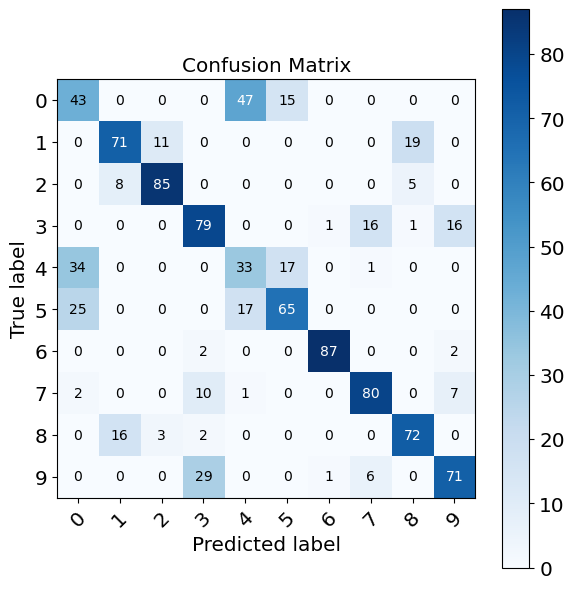

In [19]:
# add your code below
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_test,y_prev)
classes = unique_labels(y_test, y_prev)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), va='center', ha='center',
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import classification_report
# add your code below
report = classification_report(y_test,y_prev)
print(report)

              precision    recall  f1-score   support

           0       0.41      0.41      0.41       105
           1       0.75      0.70      0.72       101
           2       0.86      0.87      0.86        98
           3       0.65      0.70      0.67       113
           4       0.34      0.39      0.36        85
           5       0.67      0.61      0.64       107
           6       0.98      0.96      0.97        91
           7       0.78      0.80      0.79       100
           8       0.74      0.77      0.76        93
           9       0.74      0.66      0.70       107

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



In [21]:
# add your code below

#train/validation and test splitting
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)

#train and validation splitting
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.375,shuffle=True)

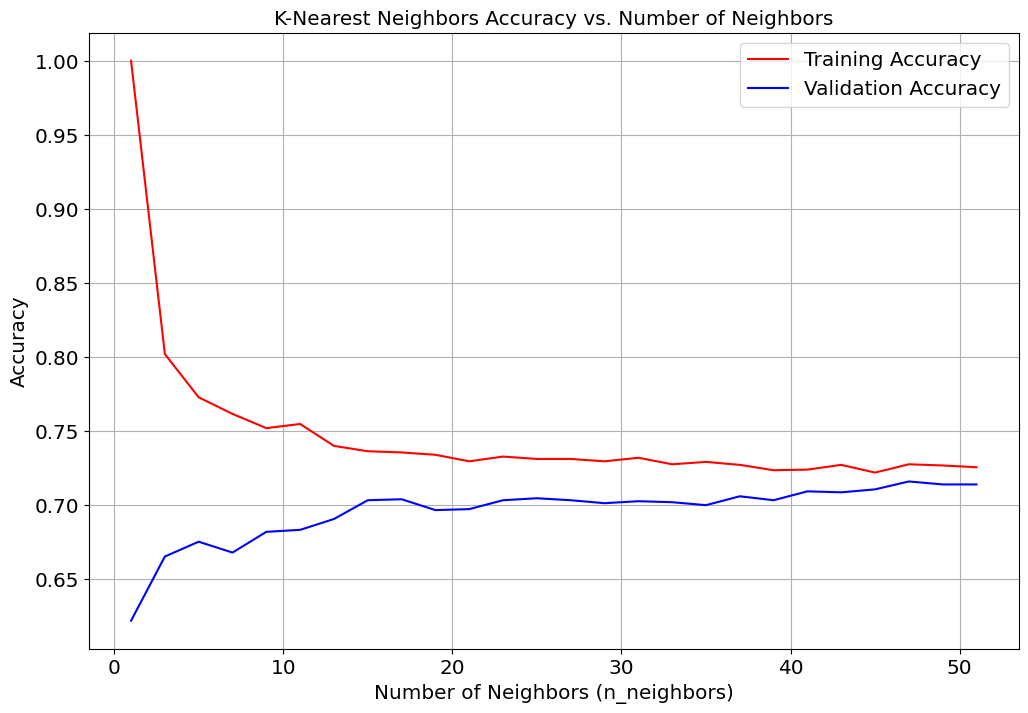

In [22]:
# add your code below

from sklearn.metrics import accuracy_score

train_acc = []
valid_acc = []

for i in range(1,52,2):

    cf = KNeighborsClassifier(n_neighbors=i)
    cf.fit(X_train, y_train)

    y_train_prev = cf.predict(X_train)
    y_valid_prev = cf.predict(X_valid)

    train_acc.append(accuracy_score(y_train,y_train_prev))
    valid_acc.append(accuracy_score(y_valid,y_valid_prev))

plt.plot(range(1, 52, 2), train_acc, label='Training Accuracy', color='red')
plt.plot(range(1, 52, 2), valid_acc, label='Validation Accuracy', color='blue')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
plt.show()
# add your code below
n_neighbors = np.argmax(valid_acc) * 2 + 1
cf = KNeighborsClassifier(n_neighbors=n_neighbors)
cf.fit(X_train, y_train)
y_prev = cf.predict(X_test)
report = classification_report(y_test, y_prev)
print(report)

              precision    recall  f1-score   support

           0       0.38      0.42      0.40        88
           1       0.77      0.77      0.77       104
           2       0.91      0.93      0.92       112
           3       0.72      0.68      0.70       105
           4       0.45      0.36      0.40       106
           5       0.65      0.71      0.68       102
           6       0.92      0.98      0.95        86
           7       0.78      0.88      0.83        91
           8       0.82      0.81      0.81       116
           9       0.67      0.62      0.65        90

    accuracy                           0.72      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.72      0.71      1000



C:\Users\simon\miniconda3\envs\EgoVision\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

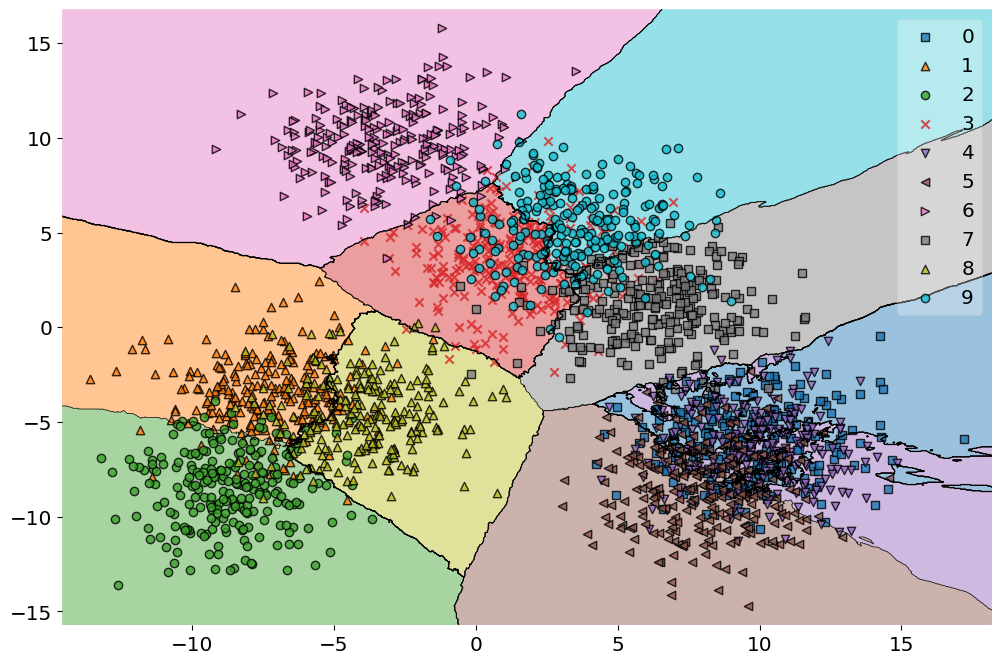

In [24]:
# add your code below
plot_decision_regions(X_train, y_train, cf)

# Part 2: Application

In this portion of the lab, you will work with audio recordings of two music genres: *Kiki* and *Bouba*. These genres are popular amongst the beings that inhabit the digital world. Download the zipfile from the Canvas lab 02 page, unzip, and put them somewhere you can find them. 

Below are two functions we will use to extract features from the audio data.

In [31]:
import numpy as np

def extractZC( data, windowsizeinsamples, windowhopinsamples ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  numbersignchanges = []
  for ii in np.arange(totalnumberofwindows):
    windowstart = int(ii*windowhopinsamples)
    windowend = int(windowstart + windowhopinsamples)
    datasign = np.sign(data[windowstart:windowend])
    datasignderivative = datasign - np.roll(datasign,1)
    numbersignchanges.append(np.count_nonzero(datasignderivative[1:-1]))
  return np.array(numbersignchanges)

def extractSC( data, windowsizeinsamples, windowhopinsamples, samplerate ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  centroid = []
  freqs = np.arange(np.ceil(windowsizeinsamples/2.0)+1)*samplerate/windowsizeinsamples
  for ii in np.arange(totalnumberofwindows):
    windowstart = int(ii*windowhopinsamples)
    windowend = int(windowstart + windowsizeinsamples)
    DATA = np.abs(np.fft.fft(data[windowstart:windowend]))
    centroid.append(np.sum(freqs*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/
                    np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)]))
  return np.array(centroid)

# 2.1 

Using the functions above, compute zero crossing and spectral centroid features for all kiki and bouba training data files using contiguous 100 ms frames. (Ignore any frames at the end of audio files that are less than that length.) Create a two-dimensional scatter plot of the features extracted from the training data. Below is what my scatter plot looks like, just so you know.

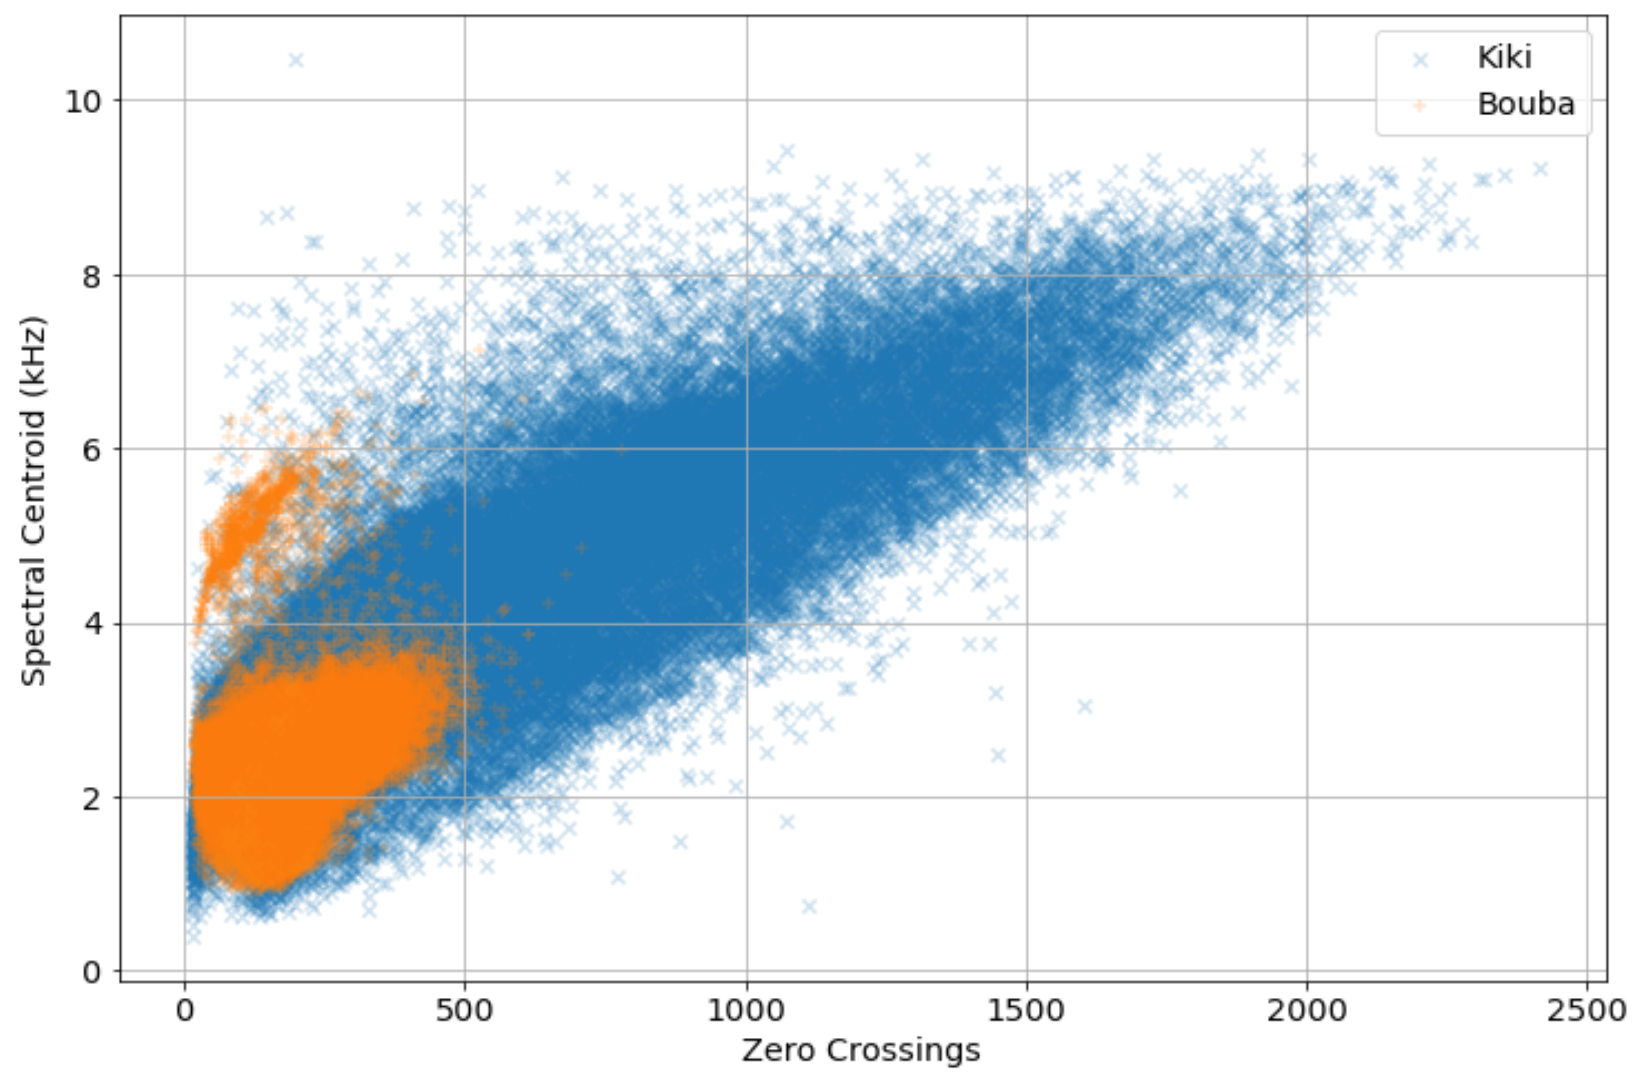

In [2]:
# add your code below
import sys
import os
import pydub
import numpy as np
sys.path.append(os.getcwd())

def extract_features(path, frame_size_seconds, window_hop_seconds):
    ZC_array = np.array([])
    SC_array = np.array([])
    counter=0

    for file in os.scandir(path):
        if file.path.endswith(".m4a"):
            #print("analyzing ", file.name, file.path)

            sound = pydub.AudioSegment.from_file(path + "/" + file.name, format = "m4a")
            sample_rate = sound.frame_rate

            windowsizeinsamples = frame_size_seconds * sample_rate
            windowhopinsamples =  window_hop_seconds * sample_rate

            samples = sound.get_array_of_samples()

            ZC = extractZC( samples, windowsizeinsamples, windowhopinsamples )
            SC = extractSC( samples, windowsizeinsamples, windowhopinsamples, sample_rate )

            ZC_array = np.append(ZC_array, ZC)
            SC_array = np.append(SC_array, SC)
            counter+=1


        
    return ZC_array, SC_array, counter


kiki_train_path  = 'kikibouba_train/kiki'
bouba_train_path = 'kikibouba_train/bouba'

frame_size_seconds = 0.100
window_hop_seconds = 0.100

# Kiki
kiki_train_ZC, kiki_train_SC, kiki_counter = extract_features(kiki_train_path, frame_size_seconds, window_hop_seconds)

# Bouba
bouba_train_ZC, bouba_train_SC, bouba_counter = extract_features(bouba_train_path, frame_size_seconds, window_hop_seconds)


# Converting Hz to kHz
kiki_train_SC  = kiki_train_SC/1000
bouba_train_SC = bouba_train_SC/1000

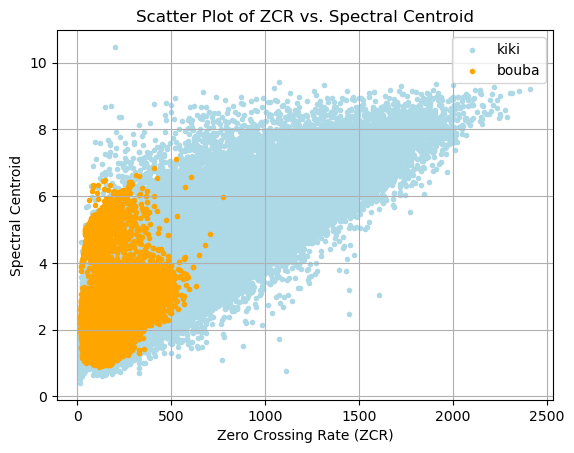

In [4]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(kiki_train_ZC, kiki_train_SC, c='lightblue', marker='.', label='kiki')
plt.scatter(bouba_train_ZC, bouba_train_SC, c='orange', marker='.', label='bouba')
plt.xlabel('Zero Crossing Rate (ZCR)')
plt.ylabel('Spectral Centroid')
plt.title('Scatter Plot of ZCR vs. Spectral Centroid')
plt.legend(loc='best')
plt.grid(True)

# Display or save the plot
plt.show()

# 2.2 

Create and plot histograms of the zero crossings feature and the spectral centroid feature for the class kiki. Use 50 bins. Do the same for bouba. Normalize each histogram by setting the parameter "density=True" in either [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) or [matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

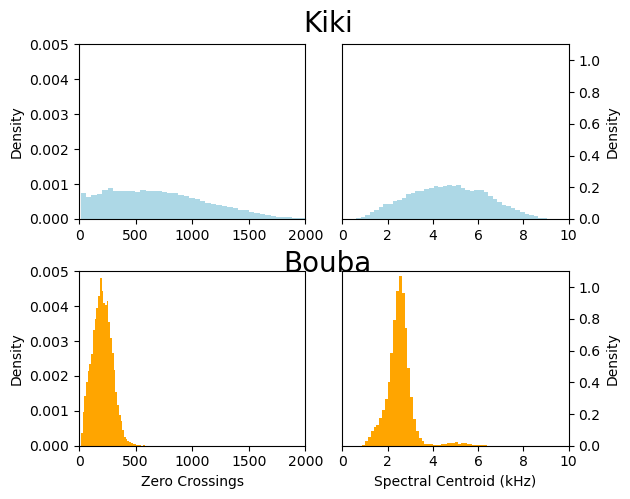

In [5]:
# add your code below
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2)
ax1.hist(kiki_train_ZC,  bins=50, density=True, color='lightblue')
ax2.hist(kiki_train_SC,  bins=50, density=True, color='lightblue')
ax3.hist(bouba_train_ZC, bins=50, density=True, color='orange')
ax4.hist(bouba_train_SC, bins=50, density=True, color='orange')

ax1.set_xlim((0,2000))
ax3.set_xlim((0,2000))

ax1.set_ylim((0,.005))
ax3.set_ylim((0,.005))

ax2.set_xlim((0,10))
ax4.set_xlim((0,10))

ax2.set_ylim((0,1.1))
ax4.set_ylim((0,1.1))

ax2.yaxis.tick_right()
ax4.yaxis.tick_right()

ax3.set_xlabel('Zero Crossings')
ax4.set_xlabel('Spectral Centroid (kHz)')

ax1.set_ylabel('Density')
ax2.set_ylabel('Density')
ax2.yaxis.set_label_position("right")
ax3.set_ylabel('Density')
ax4.set_ylabel('Density')
ax4.yaxis.set_label_position("right")

plt.figtext(0.52, 1, "Kiki", ha='center', va='center', fontsize=20)
plt.figtext(0.52, 0.5, "Bouba", ha='center', va='center', fontsize=20)
fig.tight_layout()

plt.subplots_adjust(hspace=.3)  # some extra space for the subtitles
plt.show()

# 2.3 

Let's model *each* feature of the *each* class by a Gausssian distribution.
This means we want to approximate each histogram of each feature observed in class $g$ by a Gaussian function with mean $\mu_{*,g}$ and variance $\sigma_{*,g}^2$:
$$f_{X|G}(x|g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x-\mu_{*,g})^2/2\sigma_{*,g}^2\right ]$$

Use unbiased maximum likelihood estimation (MLE) to compute the parameters of the two distributions using your training observations. Remember, the MLE mean of $N$ numbers $\{x_1, x_2, \ldots, x_N\}$ is given by $$\hat\mu = \frac{1}{N}\sum_{n=1}^N x_n$$ and the MLE variance is given by $$\sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\hat\mu)^2.$$

Plot these four distributions, overlayed on the normalized histograms of the features for the two classes.

Here's what mine look like:
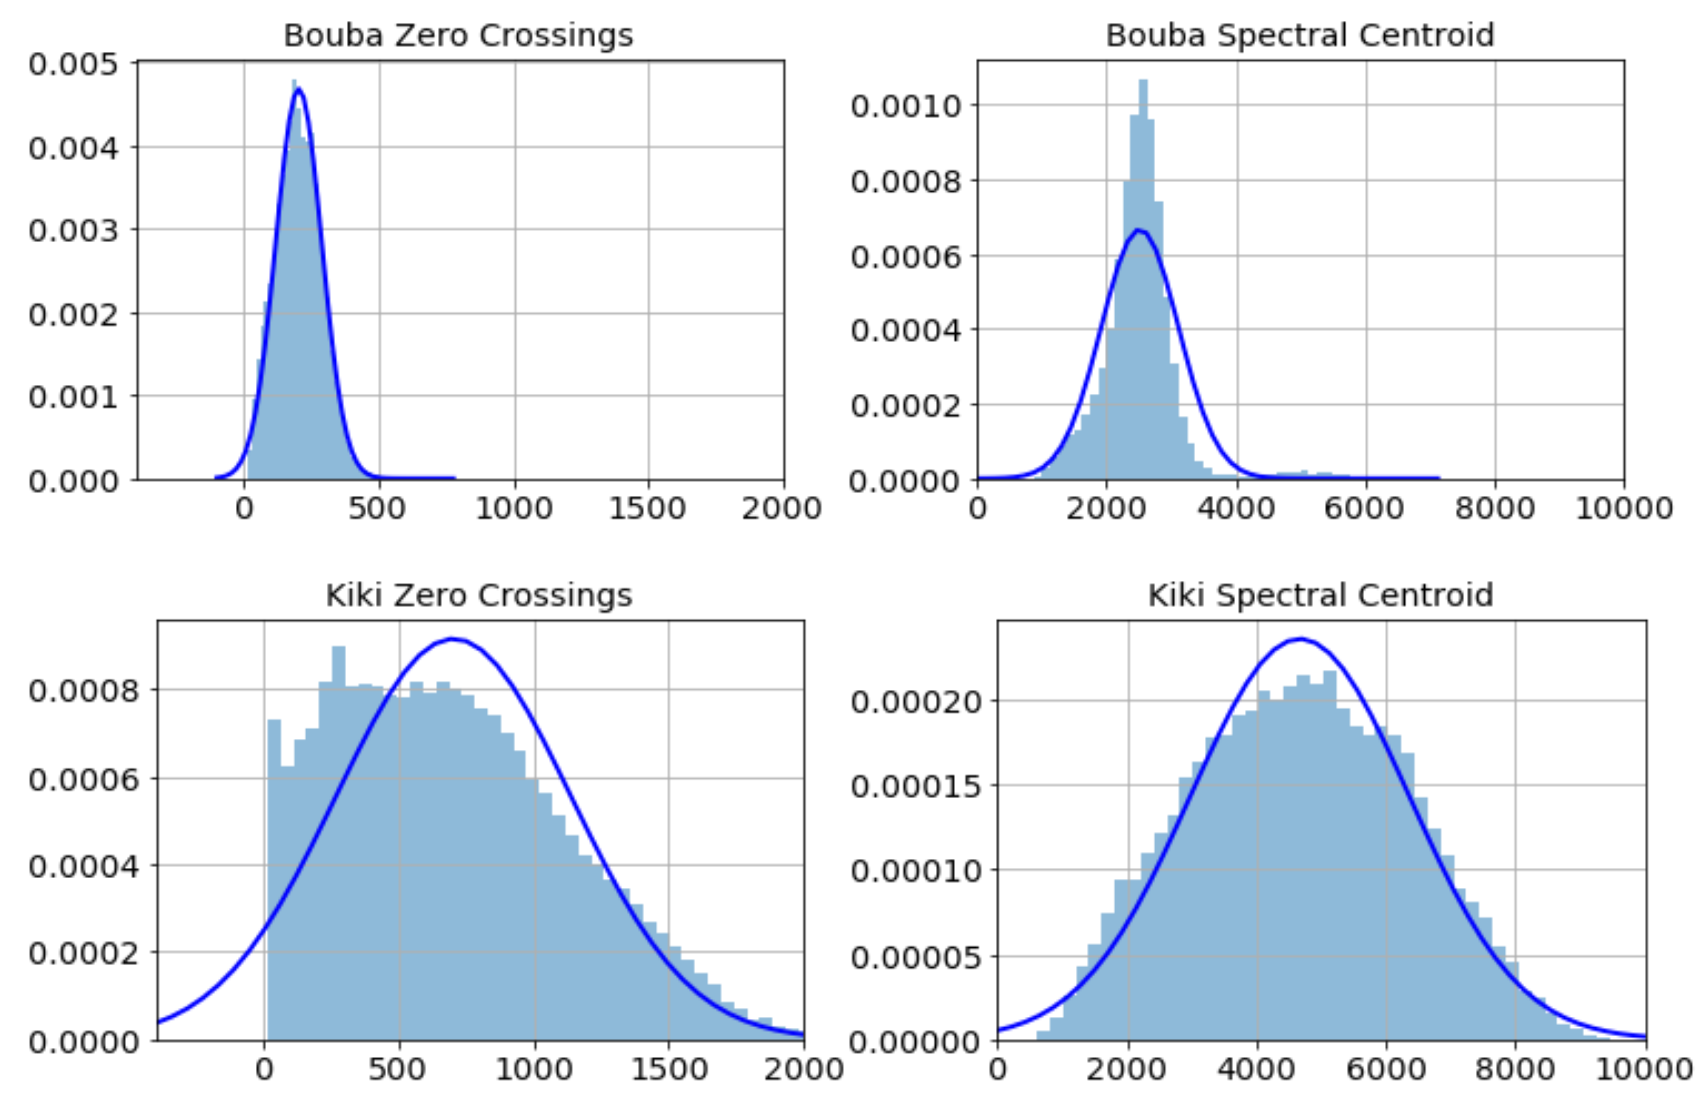

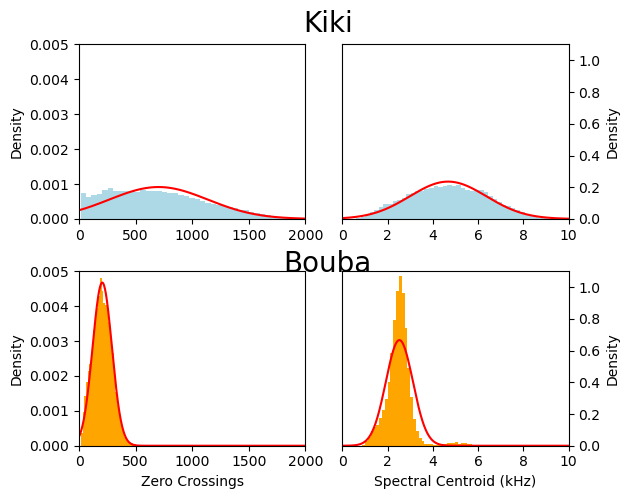

In [6]:
from scipy.stats import norm
range_ZC = np.linspace(0, 2000, 500)
range_SC = np.linspace(0, 10, 500)
# add your code below
kiki_mean_ZC = np.mean(kiki_train_ZC)
kiki_mean_SC = np.mean(kiki_train_SC)
bouba_mean_ZC = np.mean(bouba_train_ZC)
bouba_mean_SC = np.mean(bouba_train_SC)

kiki_std_ZC = np.std(kiki_train_ZC)
kiki_std_SC = np.std(kiki_train_SC)
bouba_std_ZC = np.std(bouba_train_ZC)
bouba_std_SC = np.std(bouba_train_SC)

# add your code below
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2)
ax1.hist(kiki_train_ZC,  bins=50, density=True, color='lightblue')
ax2.hist(kiki_train_SC,  bins=50, density=True, color='lightblue')
ax3.hist(bouba_train_ZC, bins=50, density=True, color='orange')
ax4.hist(bouba_train_SC, bins=50, density=True, color='orange')

ax1.plot(range_ZC, norm.pdf(range_ZC, kiki_mean_ZC, kiki_std_ZC), 'r')
ax2.plot(range_SC, norm.pdf(range_SC, kiki_mean_SC, kiki_std_SC), 'r')
ax3.plot(range_ZC, norm.pdf(range_ZC, bouba_mean_ZC, bouba_std_ZC), 'r')
ax4.plot(range_SC, norm.pdf(range_SC, bouba_mean_SC, bouba_std_SC), 'r')


ax1.set_xlim((0,2000))
ax3.set_xlim((0,2000))

ax1.set_ylim((0,.005))
ax3.set_ylim((0,.005))

ax2.set_xlim((0,10))
ax4.set_xlim((0,10))

ax2.set_ylim((0,1.1))
ax4.set_ylim((0,1.1))

ax2.yaxis.tick_right()
ax4.yaxis.tick_right()

ax3.set_xlabel('Zero Crossings')
ax4.set_xlabel('Spectral Centroid (kHz)')

ax1.set_ylabel('Density')
ax2.set_ylabel('Density')
ax2.yaxis.set_label_position("right")
ax3.set_ylabel('Density')
ax4.set_ylabel('Density')
ax4.yaxis.set_label_position("right")

plt.figtext(0.52, 1, "Kiki", ha='center', va='center', fontsize=20)
plt.figtext(0.52, 0.5, "Bouba", ha='center', va='center', fontsize=20)
fig.tight_layout()

plt.subplots_adjust(hspace=.3)
plt.show()

# 2.4

Given a particular two-dimensional observation $\mathbf{x}$ extracted from an audio file, we want to estimate the probaility of $\mathbf{x}$ coming from class $g \in \{\textrm{Kiki},\textrm{Bouba}\}$, i.e., the *posterior* $P[g|\mathbf{x}]$.
By Bayes' Theorem, we can express this probability as:

$$P[G=g|\mathbf{x}] = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]}{f_\mathbf{X}(\mathbf{x})}$$

where the *likelihood* $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$ is the probability density of observing $\mathbf{x}$ from class $g$, $P[G=g]$ is the *prior* probability of encountering $g$ regardless of what we observe, and $f_\mathbf{X}(\mathbf{x})$ is the probability density of observing $\mathbf{x}$ no matter what class.

We define the *posterior odds* of Kiki as the ratio:
$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{P[G=\textrm{Kiki}|\mathbf{x}]}{P[G=\textrm{Bouba}|\mathbf{x}]}$$
Similarly, the posterior odds of Bouba is the ratio 
$$O(G=\textrm{Bouba}|\mathbf{x}) = \frac{P[G=\textrm{Bouba}|\mathbf{x}]}{P[G=\textrm{Kiki}|\mathbf{x}]} =\frac{1}{O(G=\textrm{Kiki}|\mathbf{x})}.$$

These are easy to understand. For instance, if $O(G=\textrm{Kiki}|\mathbf{x}) = 2$, then according to our model Kiki is twice as likely given $\mathbf{x}$ than Bouba, or Bouba is half as likely as Kiki. By plugging in the equation for $P[G=g|\mathbf{x}]$, the odds of Kiki can be expressed

$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Kiki})}{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Bouba})}\frac{P[G=\textrm{Kiki}]}{P[G=\textrm{Bouba}]}$$

So the posterior odds of Kiki is just the product of the ratio of posterior probability densities and prior probabilities.

If for an observation $O(G=\textrm{Kiki}|\mathbf{x}) > 1$, then we might label it as Kiki. Otherwise we could label it Bouba.
We just need to compute the densities $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$.

This is where our Gaussian models come into play.
We know the first element of $\mathbf{x}$ is the zero crossing feature, and the second element is spectral centroid. If we assume these two features are independent, then:

$$f_{\mathbf{X}|G}(x_z,x_s|G=g) = f_{X_z|G}(x_z|G=g)f_{X_s|G}(x_s|G=g)$$

where $x_z$ is the zero crossing feature, and $x_s$ is the spectral centroid features.
If we assume each feature is distributed Gaussian, then

$$f_{X_*|G}(x_*|G=g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x_*-\mu_{*,g})^2/2\sigma_{*,g}^2\right ].$$

Given our estimates of these four parameters $\{\mu_{z,g},\sigma_{z,g}^2,\mu_{s,g},\sigma_{s,g}^2\}$ for Kiki and for Bouba, we are *almost* ready to build a classification system.

We need to estimate the prior probabilities, $P[G=\textrm{Kiki}]$ and $P[G=\textrm{Bouba}]$.

To do that, assume the training data reflects how observations are distributed in the real world, and estimate $P[G=\textrm{Kiki}]$ as the proportion of observations of Kiki in the training dataset, and $P[G=\textrm{Bouba}]$ as the proportion of observations of Bouba in the training dataset.

In [7]:
# add your code below
prior_kiki = len(kiki_train_ZC)/(len(kiki_train_ZC)+len(bouba_train_ZC))
prior_bouba = 1-prior_kiki


# 2.5

Now write a function using all the parameters you have estimated that computes the posterior odds of Kiki given a two-dimensional observation, and returns 1 (Kiki) if the odds are greater than 2, and otherwise 0 (Bouba). Use the MLE parameters you found in the previous part.

In [29]:
# add your code below
def classifier1(x):
    zc = x[0]
    sc = x[1]

    kiki_posterior  = norm.pdf(zc,kiki_mean_ZC,kiki_std_ZC) * norm.pdf(sc,kiki_mean_SC,kiki_std_SC)
    bouba_posterior = norm.pdf(zc,bouba_mean_ZC,bouba_std_ZC) * norm.pdf(sc,bouba_mean_SC,bouba_std_SC)

    posterior_ratio = kiki_posterior/bouba_posterior
    prior_ratio = prior_kiki/prior_bouba

    odds = posterior_ratio*prior_ratio

    return 1 if (odds > 2) else 0

# 2.6 

Use your function to label all observations in the training data and create one scatter plot of the labeled Kiki observations, and one scatter plot of the labeled Bouba observations, both color-coded by the predicted labels. (This should take some time to compute because the classifier you have created is not very optimized.)

In [9]:

def runClassification(kiki_data, bouba_data):

    kiki_pred = []
    bouba_pred = []
    for elem in kiki_data:
        res = classifier1(elem)
        kiki_pred.append(res)
    for elem in bouba_data:
        res = classifier1(elem)
        bouba_pred.append(res)

    kiki_pred=np.array(kiki_pred)
    bouba_pred=np.array(bouba_pred)

    return kiki_pred,bouba_pred

kiki_train = np.vstack((kiki_train_ZC,kiki_train_SC)).T
bouba_train = np.vstack((bouba_train_ZC,bouba_train_SC)).T

kiki_pred, bouba_pred = runClassification(kiki_train,bouba_train)

(0.0, 11.0)

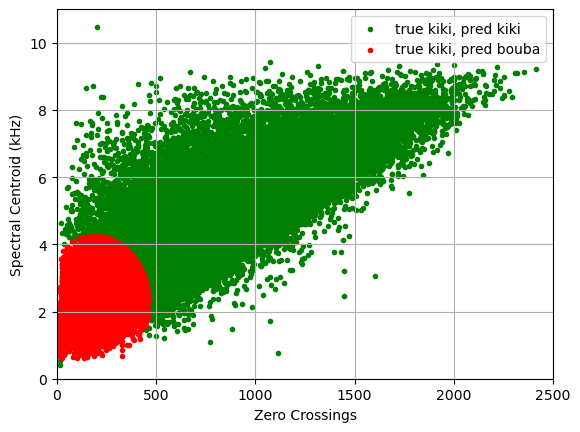

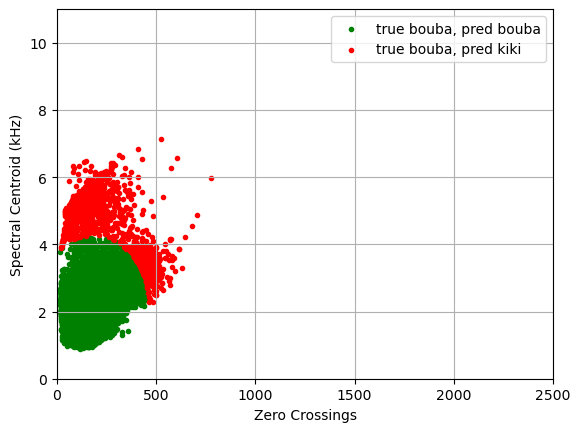

In [10]:
# Plotting

kiki_pred_bool = kiki_pred == 1
bouba_pred_bool = bouba_pred == 1


fig1, ax1 = plt.subplots()

ax1.scatter(kiki_train[kiki_pred_bool, 0],
            kiki_train[kiki_pred_bool, 1],
            c='green', marker='.', label='true kiki, pred kiki')
ax1.scatter(kiki_train[~kiki_pred_bool, 0],
            kiki_train[~kiki_pred_bool, 1],
            c='red', marker='.', label='true kiki, pred bouba')

ax1.legend()
ax1.set_xlabel('Zero Crossings')
ax1.set_ylabel('Spectral Centroid (kHz)')
ax1.grid()
ax1.set_xlim((0,2500))
ax1.set_ylim((0,11))

fig2, ax2 = plt.subplots()

ax2.scatter(bouba_train[~bouba_pred_bool, 0],
            bouba_train[~bouba_pred_bool, 1],
            c='green', marker='.', label='true bouba, pred bouba')
ax2.scatter(bouba_train[bouba_pred_bool, 0],
            bouba_train[bouba_pred_bool, 1],
            c='red', marker='.', label='true bouba, pred kiki')

ax2.legend()
ax2.set_xlabel('Zero Crossings')
ax2.set_ylabel('Spectral Centroid (kHz)')
ax2.grid()
ax2.set_xlim((0,2500))
ax2.set_ylim((0,11))


# 2.7

Explain what you see, and how it compares to the scatter plot you created in #2.1.
Comparing our results with the scatter plot computed in previous steps it is clear that the classifier is working quite well in both classes in those areas which are well separated: as a matter of fact, the green dots (correct prediction) are mainly in the top right for kiki and bottom left for bouba. In the area in which are present both classes instead we get prediction errors since there is a mixed concentration of bouba and kiki.

# 2.8 
Compute a confusion table summarizing the results of your classifier on the training dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes.

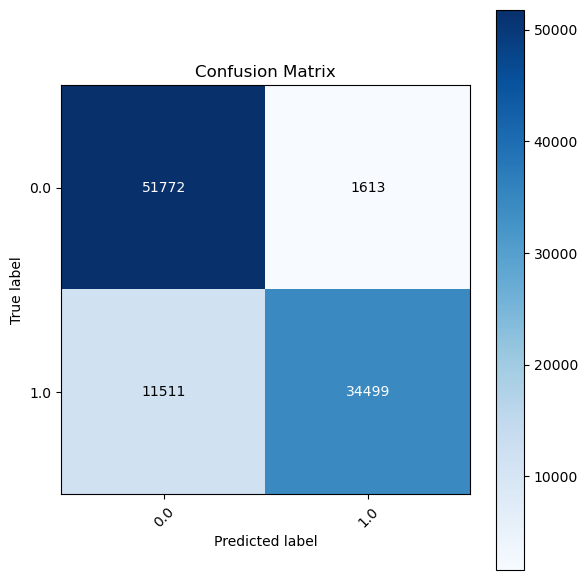

Accuracy: 0.87
Balanced Accuracy: 0.86
Precision for Class 0: 0.82
Recall for Class 0: 0.97
Precision for Class 1: 0.96
Recall for Class 1: 0.75


In [11]:
# add your code below
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score

y_true = np.hstack((np.ones(len(kiki_train_ZC)),np.zeros(len(bouba_train_ZC))))
y_prev = np.hstack((kiki_pred,bouba_pred))

cm = confusion_matrix(y_true,y_prev)
classes = unique_labels(y_true, y_prev)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), va='center', ha='center',
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Compute accuracy
accuracy = accuracy_score(y_true, y_prev)

# Compute balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_true, y_prev)

# Compute precision and recall for class 0
precision_class0 = precision_score(y_true, y_prev, pos_label=0)
recall_class0 = recall_score(y_true, y_prev, pos_label=0)

# Compute precision and recall for class 1
precision_class1 = precision_score(y_true, y_prev, pos_label=1)
recall_class1 = recall_score(y_true, y_prev, pos_label=1)

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'Precision for Class 0: {precision_class0:.2f}')
print(f'Recall for Class 0: {recall_class0:.2f}')
print(f'Precision for Class 1: {precision_class1:.2f}')
print(f'Recall for Class 1: {recall_class1:.2f}')


# 2.9 

Use your function to label all observations in the testing dataset. Compute a confusion table summarizing the results of your classifier on the testing dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes. Compare with the results on the training dataset.

In [32]:
# add your code below
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score

kiki_test_path  = 'kikibouba_test/kiki'
bouba_test_path = 'kikibouba_test/bouba'

frame_size_seconds = 0.100
window_hop_seconds = 0.100

kiki_test_ZC, kiki_test_SC, kiki_counter = extract_features(kiki_test_path, frame_size_seconds, window_hop_seconds)
bouba_test_ZC, bouba_test_SC, bouba_counter = extract_features(bouba_test_path, frame_size_seconds, window_hop_seconds)

# Converting Hz to kHz
kiki_test_SC  = kiki_test_SC/1000
bouba_test_SC = bouba_test_SC/1000

In [ ]:
kiki_test = np.vstack((kiki_test_ZC,kiki_test_SC)).T
bouba_test = np.vstack((bouba_test_ZC,bouba_test_SC)).T

kiki_pred, bouba_pred = runClassification(kiki_test,bouba_test)

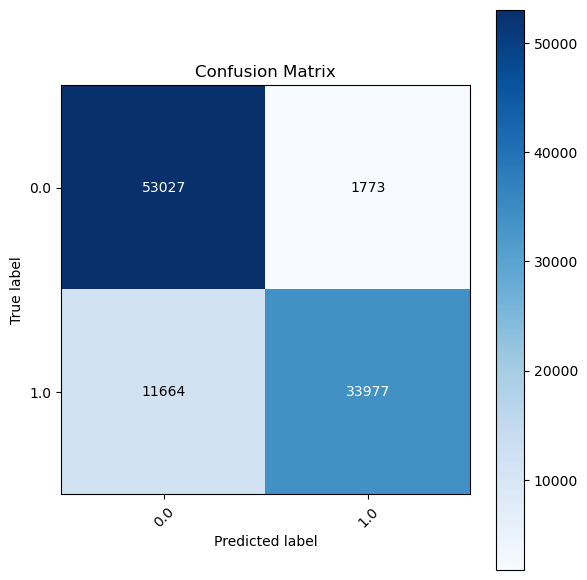

Accuracy: 0.87
Balanced Accuracy: 0.86
Precision for Class 0: 0.82
Recall for Class 0: 0.97
Precision for Class 1: 0.95
Recall for Class 1: 0.74


In [34]:
y_true = np.hstack((np.ones(len(kiki_test_ZC)),np.zeros(len(bouba_test_ZC))))
y_prev = np.hstack((kiki_pred,bouba_pred))

cm = confusion_matrix(y_true,y_prev)
classes = unique_labels(y_true, y_prev)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), va='center', ha='center',
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Compute accuracy
accuracy = accuracy_score(y_true, y_prev)

# Compute balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_true, y_prev)

# Compute precision and recall for class 0
precision_class0 = precision_score(y_true, y_prev, pos_label=0)
recall_class0 = recall_score(y_true, y_prev, pos_label=0)

# Compute precision and recall for class 1
precision_class1 = precision_score(y_true, y_prev, pos_label=1)
recall_class1 = recall_score(y_true, y_prev, pos_label=1)

print(f'Accuracy: {accuracy:.2f}')
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')
print(f'Precision for Class 0: {precision_class0:.2f}')
print(f'Recall for Class 0: {recall_class0:.2f}')
print(f'Precision for Class 1: {precision_class1:.2f}')
print(f'Recall for Class 1: {recall_class1:.2f}')



# 2.10

Discuss several ways you might build a better Kiki-Bouba classifier.
The classifier perform overall quite well: accuracy is similar between train and test partition even though there is a tendency to label data as kiki. As a matter of fact the test recall of bouba is around 0.74 while the precision of kiki is 0.82. In order to build a better classifier it would be possible to use a KNN approach tuning it using a k-fold technique: considering the nature of the dataset this approach could work quite well. Looking at the scatter plot it seems that also a SVM could perform well in such condition: the separation boundary seems evident and a linear classifier (eventually kernelized) could perform well  .